### Assignment 4  - Data Science For Consultancy

In [1]:
# Import libraries for data analysis
import pandas as pd 
import numpy as np

import warnings

warnings.simplefilter("ignore", UserWarning)

### Read data file

In [2]:
# path = ':C//documents/'
churn_data = pd.read_excel('Fitness Club Data.xlsx') 

#read csv file -> pd.read_csv

In [3]:
# churn_data.tail(10)

In [4]:
churn_data.head(10)

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default
0,19970101,2178.85,250.00,6.0,4,1,0,2,0
1,19970101,1543.65,1543.65,6.0,1,0,0,2,0
2,19970101,1107.67,125.00,5.0,1,0,0,2,0
3,19970102,950.44,237.61,9.0,5,0,0,1,0
4,19970103,1436.00,250.00,9.0,3,0,0,2,0
5,19970104,1248.00,150.00,12.0,1,0,0,1,0
6,19970105,249.00,249.00,8.0,1,0,0,2,0
7,19970105,909.79,350.00,13.0,5,1,0,2,0
8,19970106,1677.00,125.00,10.0,1,0,0,2,1
9,19970106,1844.00,1844.00,9.0,1,7,0,1,0


In [5]:
# type(churn_data)
churn_data.shape

(24843, 9)

In [6]:
## subset numerical cols - statistics of numerical features
## good way to represent numerical data
num_cols = ['price', 'downpmt', 'age', 'monthdue']
churn_data[num_cols].describe()

,price,downpmt,age,monthdue
count,24843.000000,24843.000000,24843.000000,24843.000000
mean,1003.658899,199.824535,29.203317,8.287290
std,439.224768,335.437237,13.277721,7.108381
min,0.000000,0.000000,0.000000,0.000000
25%,699.000000,49.000000,22.000000,5.500000
50%,999.000000,100.000000,28.000000,6.000000
75%,1249.000000,175.000000,36.000000,9.000000
max,9371.250000,9371.250000,99.000000,120.000000


In [7]:
#Catgeorical - Statistics
#enrolldt
#pmttype
#use
#gender
#default

In [8]:
# frequency 
churn_data['use'].value_counts()

0    9919
1    5776
6    2462
3    2385
4    1483
5    1125
7     792
2     618
8     283
Name: use, dtype: int64

In [9]:
## check any missing value or not
churn_data.isnull().sum(axis=0)  # axis=0
# np.nan
#isnull doesn't test anything other than np.nan
# ''
# ""
# "np.nan"
# "nan"

enrolldt    0
price       0
downpmt     0
monthdue    0
pmttype     0
use         0
age         0
gender      0
default     0
dtype: int64

In [10]:
# Print types of columns
churn_data.dtypes

enrolldt      int64
price       float64
downpmt     float64
monthdue    float64
pmttype       int64
use           int64
age           int64
gender        int64
default       int64
dtype: object

In [11]:
# clean age column
churn_data['age'].describe()

count    24843.000000
mean        29.203317
std         13.277721
min          0.000000
25%         22.000000
50%         28.000000
75%         36.000000
max         99.000000
Name: age, dtype: float64

## Visualization

In [12]:
# Plotting distributions
# This allows to see the distribution of numeric data and compare boolean variables
import matplotlib.pyplot as plt
# import seaborn
# import bokeh
# import plotly, plotlyexpress
fig = plt.figure(figsize = (15, 10))
ax  = fig.gca()
churn_data.hist(ax = ax, color = 'maroon')
pass # Removes the text output

In [13]:
# churn_data.downpmt

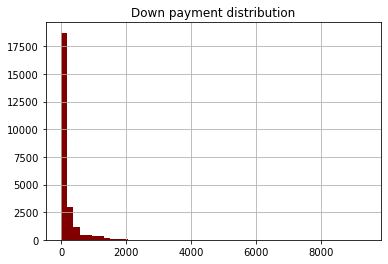

In [14]:
## plot single column
churn_data.downpmt.hist(color = 'maroon', bins = 50)
plt.title('Down payment distribution')
pass 
# As you can see, the distribution does not look very normal too

In [15]:
# check correlation
# select only numerical variables
num_cols = ['price', 'downpmt',  'age']
churn_num = churn_data[num_cols]
cor = churn_num.corr() # by deafault - pearson

In [16]:
cor

,price,downpmt,age
price,1.000000,0.277764,-0.097624
downpmt,0.277764,1.000000,0.000483
age,-0.097624,0.000483,1.000000


## Data Preprocessing

In [17]:
# churn_data = churn_data[churn_data['age']>0]

In [18]:
# Domain knowledge - Eliminate customers above 17 and 79
churn_data = churn_data[churn_data['age'].between(17, 79)]

# Dimensions 
churn_data.shape
# As a result we removed about 2000 rows

(22582, 9)

In [19]:
# payment_type = [a1, a2, a3, a4] = drop_first= true = 
# pmttype_a2, pmttype_a3, pmttype_a4
# gender [1,2] gender_1 = N-1 catgeories

In [20]:
# Create dummy variables
churn_data = pd.get_dummies(churn_data, columns = ['pmttype', 'use'], drop_first = True, prefix = ['pmttype', 'use'])

# Print
churn_data.head()

,enrolldt,price,downpmt,monthdue,age,gender,default,pmttype_3,pmttype_4,pmttype_5,use_1,use_2,use_3,use_4,use_5,use_6,use_7,use_8
2241,19970106,2175.00,400.00,5.50,17,2,0,1,0,0,0,0,0,0,0,0,0,0
2242,19970119,551.05,459.03,28.89,17,2,0,0,0,0,0,0,0,0,0,1,0,0
2243,19970127,1838.19,100.00,5.86,17,2,1,0,0,0,0,0,0,0,0,0,0,0
2244,19970130,2175.00,2175.00,6.00,17,1,0,0,0,0,0,0,0,0,0,0,0,0
2245,19970208,1464.44,1464.44,11.00,17,1,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
# Create % down payment as a new column

# This column might be helpful for our future modelling.
# Calculate percent
churn_data['downpmt_percent'] = churn_data.downpmt/churn_data.price

# Round percent column
churn_data['downpmt_percent'] = churn_data.downpmt_percent.round(2)

# Print
churn_data.tail()

,enrolldt,price,downpmt,monthdue,age,gender,default,pmttype_3,pmttype_4,pmttype_5,use_1,use_2,use_3,use_4,use_5,use_6,use_7,use_8,downpmt_percent
24818,19980824,1023.00,175.00,7.0,79,1,0,0,0,1,1,0,0,0,0,0,0,0,0.17
24819,19980827,774.00,50.00,7.0,79,1,0,0,0,1,0,0,0,0,0,0,0,0,0.06
24820,19980903,1198.00,100.00,23.0,79,2,0,0,1,0,1,0,0,0,0,0,0,0,0.08
24821,19981009,651.63,651.63,34.0,79,1,0,1,0,0,0,0,0,0,0,0,0,0,1.00
24822,19981106,1048.00,1048.00,5.0,79,1,0,1,0,0,0,0,1,0,0,0,0,0,1.00


In [22]:
# df = df.drop([A, B, C], axis=1)
# df.drop([A, B, C], axis=1, inplace=True)

In [23]:
#Drop a column
# Drop the enrolldt varibale
churn_data= churn_data.drop(['enrolldt'], axis = 1)

In [24]:
churn_data.isnull().sum(axis=0)

price               0
downpmt             0
monthdue            0
age                 0
gender              0
default             0
pmttype_3           0
pmttype_4           0
pmttype_5           0
use_1               0
use_2               0
use_3               0
use_4               0
use_5               0
use_6               0
use_7               0
use_8               0
downpmt_percent    24
dtype: int64

In [26]:
# imputation method 1
avg = churn_data['downpmt_percent'].mean()
churn_data = churn_data.fillna(avg, axis=1)

#imputation method 2
# churn_data.fillna(avg, axis=1, inplace=True)

## imputation method 3
# df=df.fillna({'a':0,'b':0})

In [27]:
# remove correlated features - age, price 0.90 - price

## Model Building - Logistic Regession

In [28]:
# Split data, creating two dataframes - one with all features (X) and another one - with just default variable (y)
y = churn_data['default']
X = churn_data.drop('default', axis = 1)

# Print y to double check it
# y.head(5)
# X.head(5)

In [29]:
X.head(5)

,price,downpmt,monthdue,age,gender,pmttype_3,pmttype_4,pmttype_5,use_1,use_2,use_3,use_4,use_5,use_6,use_7,use_8,downpmt_percent
2241,2175.00,400.00,5.50,17,2,1,0,0,0,0,0,0,0,0,0,0,0.18
2242,551.05,459.03,28.89,17,2,0,0,0,0,0,0,0,0,1,0,0,0.83
2243,1838.19,100.00,5.86,17,2,0,0,0,0,0,0,0,0,0,0,0,0.05
2244,2175.00,2175.00,6.00,17,1,0,0,0,0,0,0,0,0,0,0,0,1.00
2245,1464.44,1464.44,11.00,17,1,0,0,0,0,0,0,0,0,0,0,0,1.00


In [30]:
# Split X and y into training and testing sets
# 0.8 for training and 0.2 for testing one
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify= y) # stratify allows you same distribution of variable

In [34]:
# y = default = 90 no-churn, 10 churn category
# 90%, 10% - Dataset stratify
# Train = 90%NC, 10%C
# Test = 90%NC, 10%C

In [35]:
# Create a model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [36]:
# Fit the model with data
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
# Predict
y_pred = logreg.predict(X_test) # predict class

In [38]:
# Prediction = [0, 1, 1, 0]
# Actual =     [0, 1, 0, 0]

# 3/4

In [39]:
# logreg.predict_proba(X_test)

In [40]:
#scaling the data - explore
# scaler = StandardScaler()

from collections import Counter
Counter(y_pred)

Counter({0: 4213, 1: 304})

### 4.1. Confusion matrix

    Let's start from a confusion matrix.

    In this matrix we will have four elements:

    true positives (TP): These are cases in which we predicted yes (1), and it was correct
    true negatives (TN): We predicted no, and we don't have 0
    false positives (FP): We predicted yes, but we were wrong and instead of 1 it is 0
    false negatives (FN): We predicted no (0), but we were wrong again and the value is actually equal to 1.

In [41]:
y_test #actual Y

16794    0
19729    0
5097     0
14595    0
22887    0
        ..
3536     0
8368     0
3351     0
11332    0
20836    0
Name: default, Length: 4517, dtype: int64

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("The Confusion Matrix is \n \n", confusion_matrix(y_test, y_pred))

The Confusion Matrix is 
 
 [[3872  103]
 [ 341  201]]


In [43]:
# 230 = Churn correctly
# 3840 = Non Churn correctly

In [44]:
print("The Classification table is \n \n", classification_report(y_test, y_pred))

The Classification table is 
 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      3975
           1       0.66      0.37      0.48       542

    accuracy                           0.90      4517
   macro avg       0.79      0.67      0.71      4517
weighted avg       0.89      0.90      0.89      4517



In [45]:
# Create a ROC curve
from sklearn import metrics
y_pred_proba = logreg.predict_proba(X_test)[::, 1]
fpr, tpr, _  = metrics.roc_curve(y_test,  y_pred_proba)

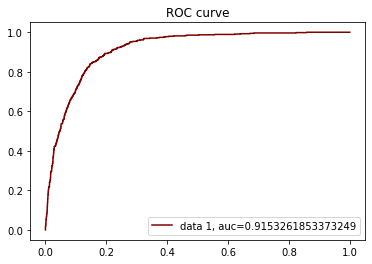

In [46]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc="+str(auc), color = 'maroon')
plt.legend(loc = 4)
plt.title('ROC curve')
plt.show()

### Gains Chart

Gains Chart is a common technique used in direct marketing where we select a small set of people to get a large number of responders.

Baseline: Expected positives without the model in place
Model: Once we have the model in place and group the observations into bins as per their predicted probabilities we can get a lift/gain in predicition correctness.

In [47]:
# !pip install scikit-plot 

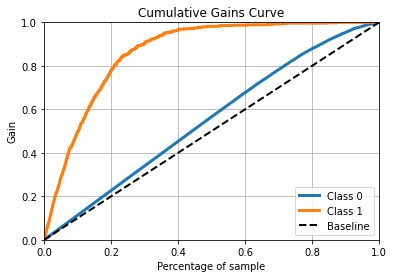

In [48]:
# Create a chart
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test,logreg.predict_proba(X_test))
plt.show()

### Feature Selection

In [49]:
# Getting the best coefficients
feature_imp = logreg.coef_
coef_table = pd.DataFrame({"feature_names":X_train.columns, "Beta":feature_imp[0], "AbsBeta":abs(feature_imp[0])})
# Get the sorted values
coef_table = coef_table.sort_values(by = 'AbsBeta', ascending = False)
print("The most important features in the model are: \n")
coef_table

The most important features in the model are: 



,feature_names,Beta,AbsBeta
6,pmttype_4,-4.440822,4.440822
7,pmttype_5,-3.367205,3.367205
13,use_6,-1.913380,1.913380
10,use_3,-1.420255,1.420255
11,use_4,-1.145519,1.145519
5,pmttype_3,-0.974507,0.974507
12,use_5,-0.968574,0.968574
8,use_1,-0.739500,0.739500
14,use_7,-0.603143,0.603143
9,use_2,-0.389608,0.389608
